- This notebook consist of **3 parts**.
- All the <font color="darkred">questions</font> to answer are written in <font color="darkred">dark red</font> color.[10 questions in total]
- For all the <font color="darkgreen">code lines</font> that <font color="darkgreen">need to be completed</font>,a comment line start with <font color="darkgreen">#TODO</font> is there in the before line.[3 #TODOs in total]

## Change the runtime type to a GPU compatible runtime

#**Part I** : Neural Networks Recap

* **A neural network** is a computational model inspired by the way biological neural networks in the human brain process information. It consists of interconnected units (neurons) organized in layers: an input layer, one or more hidden layers, and an output layer. These networks can learn to perform a variety of tasks by adjusting the weights (connections) between neurons based on training data.

* **Deep Neural Networks(DNNs)** are a powerful and flexible type of machine learning model capable of learning complex patterns from data(automatic feature extraction).A DNN for object detection is a type of artificial neural network designed to identify and locate objects within images.

* **Classical models** for object detection that require humans to manually create features typically involve a two-step process: feature extraction followed by classification. In these models, the feature extraction step is where domain knowledge is utilized to design handcrafted features that are then used by a separate classifier to detect objects.
  
  #### Example :
   Histogram of Oriented Gradients (HOG) + Support Vector Machine (SVM)
   
    Feature Extraction: HOG computes histograms of gradient orientations in localized portions of an image. It captures local object appearance and shape by counting occurrences of gradient orientation in localized portions of an image.

    Classifier: SVM is often used to classify the extracted features into different object categories based on the learned patterns.

      








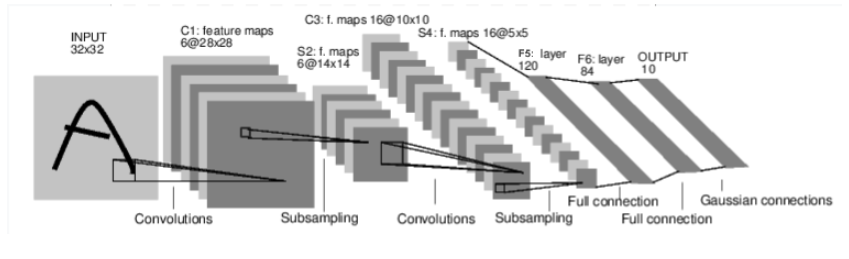

<font color="darkblue">Figure 1 : An example Neural Network (NN) - Inputs, Convolution layers, Fully connected layers,output layers , feature maps, outputs</font>



<font color="darkred">Q1: what is the significance of activation function in neural networks?</fon>

### Answer

<font color="green">Real-world data often involve complex, non-linear relationships. Activation functions introduce non-linearity into the network, enabling it to model these complex patterns. Without non-linearity, a neural network composed of linear layers would behave like a single-layer perceptron, unable to solve problems that are not linearly separable.</font>

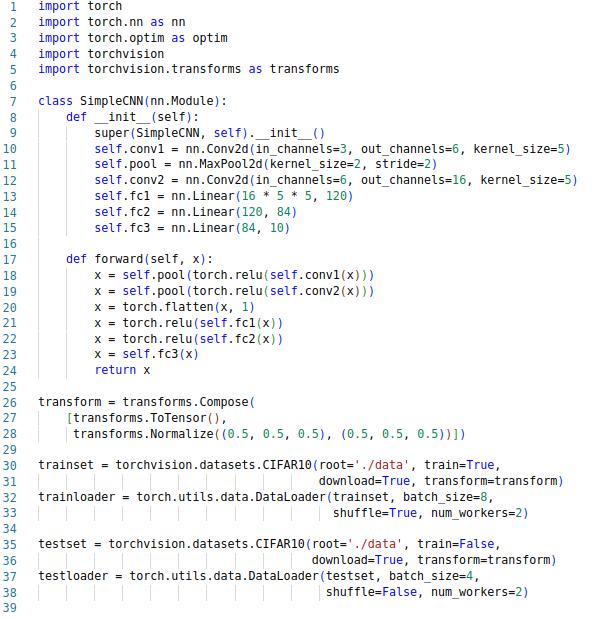

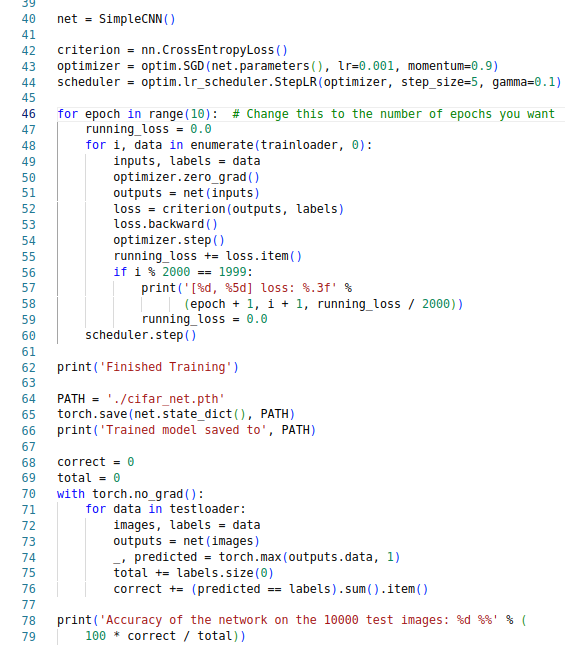

<font color="darkblue">Figure 2 : Pytorch Implementation of simple NN with the code for training and inference</font>

<font color="darkred">Q2:Use the above code fragment to answer the following questions

1. What are the different layers used in the neural network?
2. What is the activation function used?
3. What is the loss function?
4. What is optimizer and the scheduler used for training?
5. How many iterations are used for training?
6. What is the name of the saved pytorch trained model?
7. What is the batch size used for training?
8. What are the line numbers of the program?
     - where the model is used for predictions?
     - call to run backpropagation for gradient calculation?
     - stop the model's weight update for inference? </font>

### Answer:

<font color = "green"> 1. Conv,FCN,Maxpool
2. ReLU
3. CrossEntrophy
4. Stochastic Gradient Descent(SGD) and stepLR
5. iterations = 10
6. cifar_net.pth
7. train batch size = 8
8. (51,73) ; (53) ; (70)
</font>



# **Part 2**: YOLO Recap

## Ground Truth/Label generation


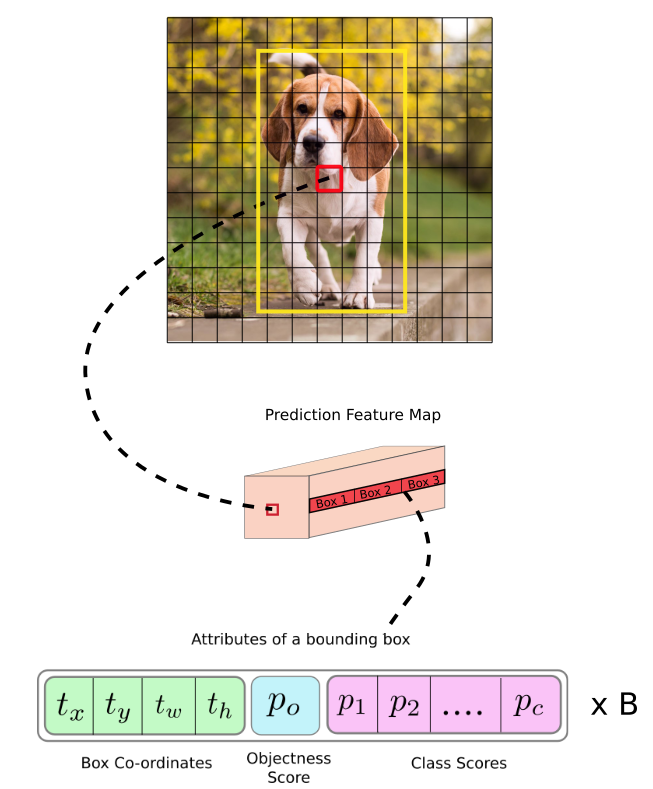

<font color="darkblue"> Figure 3</font>

### Different Labelling/annotation convensions
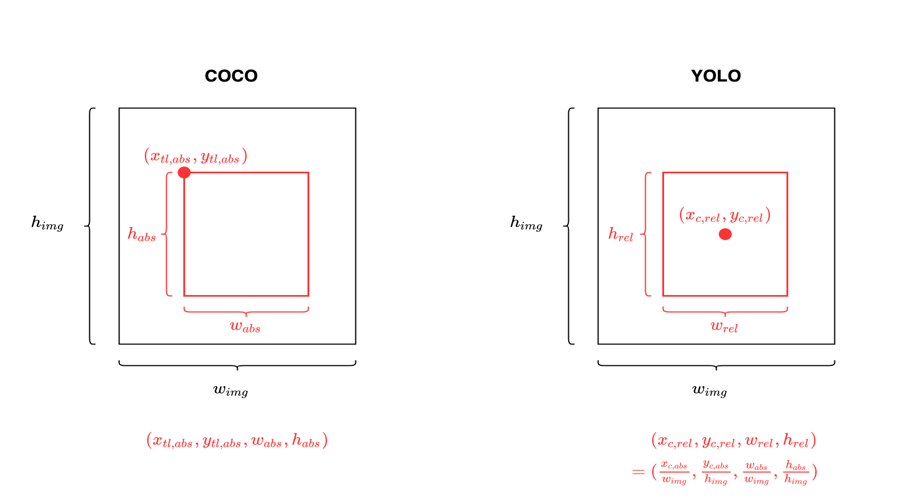

<font color="darkblue"> Figure 4</font>

<font color="darkred">Q3: What would be the YOLO label for a bounding box with a ground truth width and height of (200,100) and a center pixel at (300,200), within an image of dimensions (600x400)?</font>

### Answer

<font color="green">(cx,cy,w,h) = (0.5, 0.5,0.33, 0.25)</font>

### Prediction
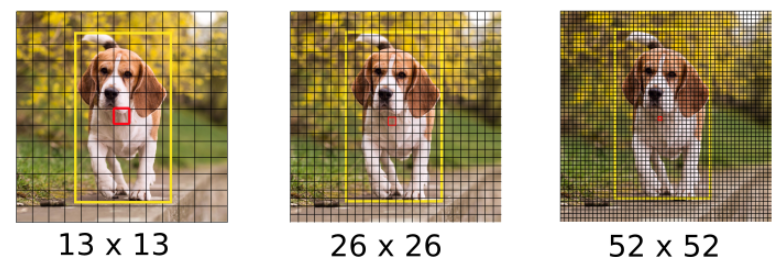

<font color="darkblue">Figure 5</font>

<font color="darkred">Q4 : Among the three output feature map spatial dimensions for predictions shown in figure 5, which dimension is most suitable for detecting large-sized objects?</font>

### Answer

<font color="green">(13x13)</font>

### Anchor boxes
* By predefining a set of anchor boxes of different scales and aspect ratios at each position on the feature map, the network can effectively learn to adjust these boxes to fit the objects in the image.
* provide a way to simultaneously predict multiple objects at different scales and aspect ratios from the same region in the feature map.
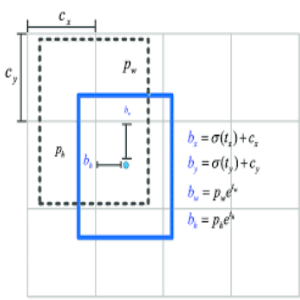
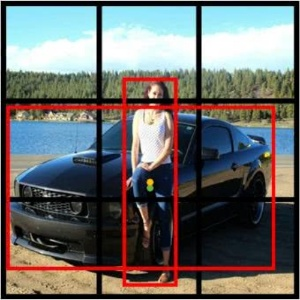


<font color="darkred"> Q5: What is the significance of applying the sigmoid function to the predicted bounding box offsets in relation to anchors in the given figure? </font>

### Answer
<font color="green">The sigmoid function normalizes the predicted values to the range [0, 1]. In YOLO, the image is divided into a grid, and the center coordinates of the bounding box are predicted relative to the cell containing the object. By applying the sigmoid function, the predicted coordinates are normalized to this grid cell, making them consistent and interpretable within the grid cell.</font>

###Predicted output

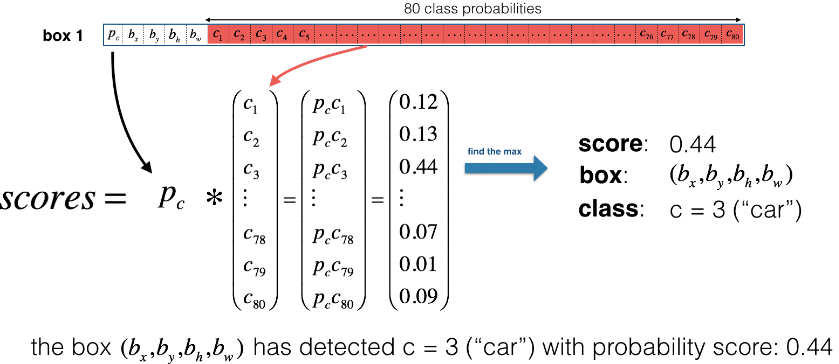

### Loss Components

**Box Loss**: YOLOv5 uses CIoU or GIoU loss for bounding box regression. These metrics improve upon IoU by considering not just the overlap area but also the distance between the center points of the predicted and ground truth boxes and the aspect ratio.

**Objectness Loss**: This component evaluates the confidence score that indicates whether a bounding box contains an object. YOLOv5 uses binary cross-entropy loss for this part.

**Classification Loss**: This part evaluates the probability distribution over all classes for each detected object. YOLOv5 uses binary cross-entropy loss (BCE) for multi-label classification tasks.


<font color="darkred"> Q6: If the network predicts an objectness score of 0.8 for a specific grid cell is 0.8, by using the following formula(binary cross entrophy loss) calculate the objectness loss.(p<sub>t</sub> - ground truth objectness score, p<sub>o</sub> - predicted objectness score)</font>


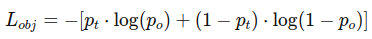


### Answer :
 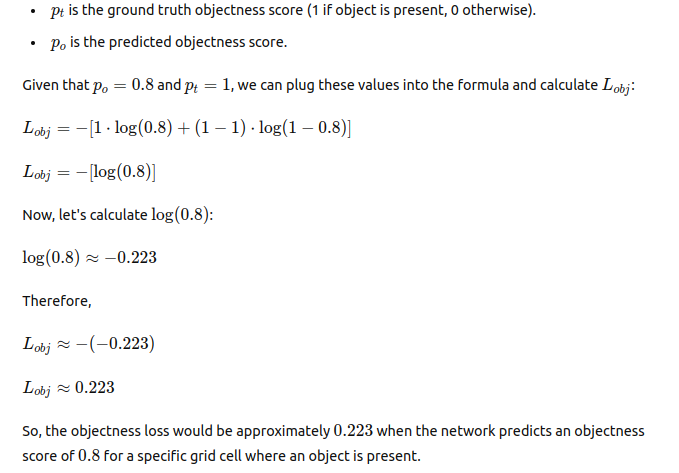


# **Part 3** : Target Detection with YOLOv5

## Train and Inference in Pytorch

checkout the yolov5 code with git

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16631, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 16631 (delta 62), reused 68 (delta 31), pack-reused 16522
Receiving objects: 100% (16631/16631), 15.10 MiB | 19.65 MiB/s, done.
Resolving deltas: 100% (11421/11421), done.


In [ ]:
import os

In [ ]:
os.chdir('yolov5')

In [ ]:
os.getcwd()

'/content/yolov5'

Install the Required libraries

In [ ]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

In [ ]:
#Assuming runtime restarted after installing requirements
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('yolov5')

In [ ]:
os.getcwd()

'/content/yolov5'

Download the dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1dsCYTGLkWG7jYPD8PcbqIQEVNw2GZfmx

Downloading...
From (original): https://drive.google.com/uc?id=1dsCYTGLkWG7jYPD8PcbqIQEVNw2GZfmx
From (redirected): https://drive.google.com/uc?id=1dsCYTGLkWG7jYPD8PcbqIQEVNw2GZfmx&confirm=t&uuid=d0981c05-a0c8-4bf9-9683-a5f3065133e4
To: /content/yolov5/dl_target_dataset.zip
100% 157M/157M [00:01<00:00, 128MB/s]


Extract the dataset 'dl_target_dataset.zip' to 'yolov5/data' folder

In [ ]:
!unzip ./dl_target_dataset.zip -d data

Archive:  ./dl_target_dataset.zip
  inflating: data/dl_target_dataset/aerotrain_dataset_04_220.txt  
  inflating: data/dl_target_dataset/aerotrain_dataset_04_68.png  
  inflating: data/dl_target_dataset/aerotrain_dataset_05_1.png  
  inflating: data/dl_target_dataset/aerotrain_dataset_04_220.png  
  inflating: data/dl_target_dataset/aerotrain_dataset_02_69.txt  
  inflating: data/dl_target_dataset/aerotrain_dataset_05_153.txt  
  inflating: data/dl_target_dataset/aerotrain_dataset_08_261.txt  
  inflating: data/dl_target_dataset/aerotrain_dataset_02_301.png  
  inflating: data/dl_target_dataset/aerotrain_dataset_02_219.png  
  inflating: data/dl_target_dataset/aerotrain_dataset_13_102.png  
  inflating: data/dl_target_dataset/aerotrain_dataset_13_78.txt  
  inflating: data/dl_target_dataset/aerotrain_dataset_13_209.png  
  inflating: data/dl_target_dataset/aerotrain_dataset_02_69.png  
  inflating: data/dl_target_dataset/aerotrain_dataset_02_219.txt  
  inflating: data/dl_target_datase

In [ ]:
os.getcwd()

'/content/yolov5'

Copy split_data.py and dataset.yaml to the current working directory.

Split dataset to train and validation sets. After executing the following line check the content of the yolov5/data folder and identify images and labels for your train and validation sets

In [ ]:
!python split_data.py

copying training data
copying validation data
finished


copy the dataset.yaml. Check the content of the dataset.yaml.

In [ ]:
import torch
torch.cuda.is_available()

True

Execute the following code line to train the yolov5 model for 10 epochs.

while training, have a look on the yolov5/utils/augmentations.py

<font color="darkred">**Q7**: What are different types of data augmentations used for training?</font>

### Answer

<font color="green">RandomResizedCrop(height=size, width=size, scale=(0.8, 1.0), ratio=(0.9, 1.11), p=0.0),
Blur(p=0.01),
MedianBlur(p=0.01),
RandomBrightnessContrast(p=0.0),RandomGamma(p=0.0),random_perspective,vertical flip,horizontal flip</font>

In [ ]:
!python train.py --img 640 --batch 16 --epochs 10 --data dataset.yaml --weights yolov5s.pt --freeze 0 1 2 3 4 5 6 7 8 9 10

2024-05-24 18:40:13.140488: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 18:40:13.140544: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 18:40:13.141995: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, op

<font color="darkred">Q8: What are evaluation metrics used to evaluate the detection performance during validation phase? </font>

### Answer
<font color="green">mAP50 , mAP50-95 </font>

Execute the following code line to visualize the detection of a image from validation set.

<font color="darkred">Q9: Have a look on yolov5/detect.py. What kind of different types that we can feed to the '--source' option in the following command?</font>

### Answer:

<font color="green">single image,list of images,video files,webcam,youtube/video streaming, folder path that contain set of images </font>

In [ ]:
!python detect.py --weights "./runs/train/exp2/weights/best.pt" --img 640 --conf 0.4 --source './data/images/validation/refinery_1_34.png'   #"./data/images/validation/aerotrain_dataset_06_274.png"

detect: weights=['./runs/train/exp2/weights/best.pt'], source=./data/images/validation/refinery_1_34.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/validation/refinery_1_34.png: 640x480 1 target, 49.4ms
Speed: 0.5ms pre-process, 49.4ms inference, 613.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [ ]:
from IPython import display

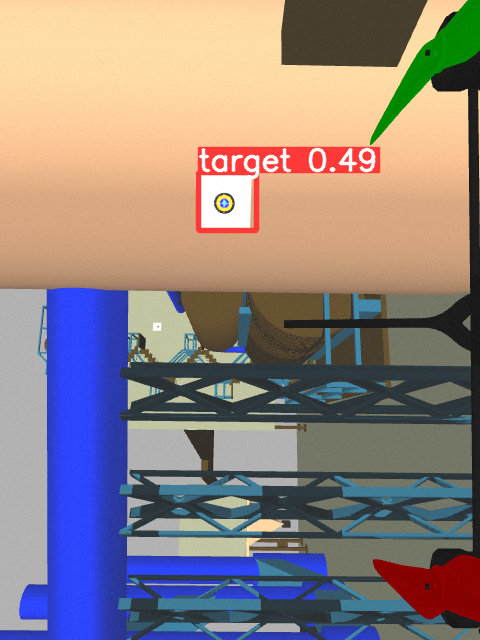

In [ ]:
display.Image('./runs/detect/exp3/refinery_1_34.png')

## Using the trained pytorch model in openCV
* using PyTorch models for inference with OpenCV's DNN module can be a good approach for resource-constrained environments

* OpenCV's DNN module does not support loading PyTorch models directly. To use a YOLOv5 model with OpenCV, you need to export the model to a format that OpenCV's DNN module can read, such as ONNX (Open Neural Network Exchange).

In [ ]:
!python ./export.py --weights ./runs/train/exp2/weights/best.pt --img 640 --include torchscript onnx

export: data=data/coco128.yaml, weights=['./runs/train/exp2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp2/weights/best.pt with output shape (1, 25200, 6) (13.8 MB)

TorchScript: starting export with torch 2.3.0+cu121...
TorchScript: export success ✅ 2.6s, saved as runs/train/exp2/weights/best.torchscript (27.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 117.5 MB/s eta 0:00:00

requirements: Aut

In [ ]:
import cv2
import numpy as np

load the converted model

In [ ]:
net = cv2.dnn.readNet('./runs/train/exp2/weights/best.onnx')

### Input preprocessing

In object detection, preserving the aspect ratios of the objects is crucial for accurate detection. When converting rectangular images to the square dimensions expected by the model (e.g., 640x640), **resizing** along with **zero padding** is commonly used to maintain aspect ratios.


In [ ]:
def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=False, scaleFill=False, scaleup=True, stride=32):
    #Resize the original image to preserve aspect ratio
    #Do the padding if final featuremap dimensions are not a integer multiple of 'stride'

    """Resizes and pads image to new_shape with stride-multiple constraints, returns resized image, ratio, padding."""
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border

    return im, ratio, (dh, dw)

In [ ]:
src_path = './data/images/validation/aerotrain_dataset_06_274.png'
im = cv2.imread(src_path)
resize_im,ratio,(dh,dw) = letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=False, scaleFill=False, scaleup=True, stride=32)
ratio_pad = (ratio,(dh,dw)) #for future bbox recaling

In [ ]:
print("resize img shape ",resize_im.shape)
print("ratio ",ratio)
print("(dh,dw)",(dh,dw))

resize img shape  (640, 640, 3)
ratio  (1.0, 1.0)
(dh,dw) (80.0, 0.0)


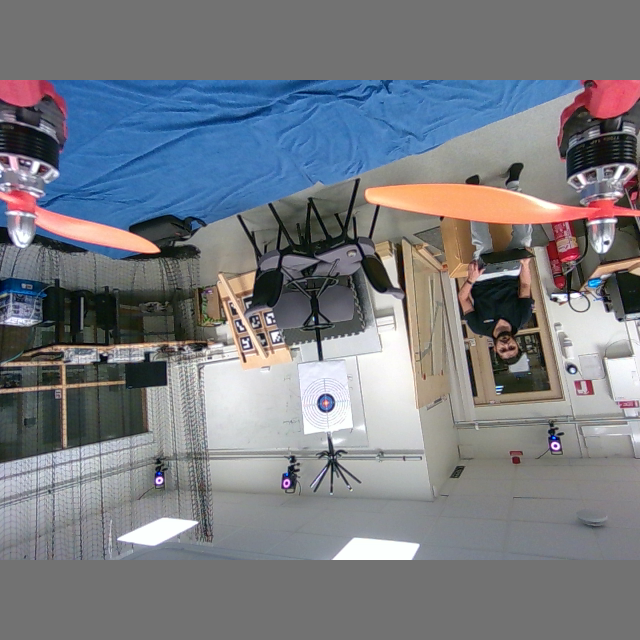

In [ ]:
from PIL import Image
Image.fromarray(resize_im)

opencv DNN module API : https://docs.opencv.org/4.x/d6/d0f/group__dnn.html

In [ ]:
#TODO : Feed the resized image to the "cv2.dnn.blobFromImage" normalizing with (1/255) and swapping Red and Blue channels. Assign the result to blob_img

blob_img = cv2.dnn.blobFromImage(resize_im, 1/255.0,(640,640), swapRB=True)

In [ ]:
print("blob_img shape ",blob_img.shape)

blob_img shape  (1, 3, 640, 640)


In [ ]:
#set the blob_img as the input to the network
net.setInput(blob_img)
#TODO : call the network prediction and assign the prediction results to prediction variable
prediction = net.forward()
print(prediction)

[[[ 1.3559723e-01  1.4902258e+00  3.3684708e+01  1.6652948e+01
    1.3418360e-04  9.9997950e-01]
  [ 6.4911728e+00 -7.7298522e-01  3.4628284e+01  2.1534023e+01
    7.6331067e-05  9.9998522e-01]
  [ 1.4481644e+01  9.2876816e-01  3.4284866e+01  2.6450439e+01
    9.6856449e-05  9.9998057e-01]
  ...
  [ 5.6156744e+02  6.1565021e+02  5.1793707e+02  3.4685977e+02
    2.8735467e-03  9.9997520e-01]
  [ 5.9427692e+02  6.1699445e+02  4.9780075e+02  3.3591266e+02
    1.5383024e-03  9.9997485e-01]
  [ 6.2081476e+02  6.1522461e+02  4.6621024e+02  3.1246173e+02
    1.3478769e-03  9.9997795e-01]]]


In [ ]:
print(prediction.shape)

(1, 25200, 6)


We use following functions to decode the predictions and rescale the predictions to match with the original image dimensions

In [ ]:
def rescale_boxes(img1_shape, boxes, img0_shape, ratio_pad):

    gain = ratio_pad[0] #gain is a tuple
    pad = ratio_pad[1] #pad is a tuple

    boxes[:,[0,2]] -= pad[1] #x padding
    boxes[:,[0,2]] /= gain[1] # x gain
    boxes[:,[1,3]] -= pad[0] #y padding
    boxes[:,[1,3]] /= gain[0] #y gain

    if isinstance(boxes, torch.Tensor):  # faster individually
        boxes[:, 0].clamp_(0, img0_shape[1])  # x1
        boxes[:, 1].clamp_(0, img0_shape[0])  # y1
        boxes[:, 2].clamp_(0, img0_shape[1])  # x2
        boxes[:, 3].clamp_(0, img0_shape[0])  # y2
    else:  # np.array (faster grouped)
        boxes[:, [0, 2]] = boxes[:, [0, 2]].clip(0, img0_shape[1])  # x1, x2
        boxes[:, [1, 3]] = boxes[:, [1, 3]].clip(0, img0_shape[0])  # y1, y2

    return boxes

In [ ]:
def unwrap_detection(input_image, output_data,ratio_pad,resized_dim = (640,640),conf_thres = 0.2):
    class_ids = []
    confidences = []
    boxes = []

    rows = output_data.shape[0]

    for r in range(rows):
        row = output_data[r]
        confidence = row[4]
        if confidence >= conf_thres:

            classes_scores = row[5:]
            _, _, _, max_indx = cv2.minMaxLoc(classes_scores)
            class_id = max_indx[1]
            if (classes_scores[class_id] > .25):

                confidences.append(confidence)
                class_ids.append(class_id)
                x, y, w, h = row[0].item(), row[1].item(), row[2].item(), row[3].item()

                left = (x - 0.5 * w)
                top = (y - 0.5 * h)
                right = (x + 0.5 * w)
                bottom = (y + 0.5 * h)
                box = np.array([left,top,right,bottom]).reshape(-1,4)

                box = rescale_boxes(resized_dim, box, input_image.shape, ratio_pad)

                unwrap_left = int(box[:,0].item())
                unwrap_top = int(box[:,1].item())
                unwrap_width = int((box[:,2] - box[:,0]).item())
                unwrap_height = int((box[:,3] - box[:,1]).item())

                box = np.array([unwrap_left, unwrap_top, unwrap_width, unwrap_height])
                boxes.append(box)

    return class_ids, confidences, boxes

In [ ]:
#remove the first/batch dimension from the prediction
prediction = prediction.squeeze(0)

In [ ]:
prediction.shape

(25200, 6)

Get the decoded prediction results

In [ ]:
result_class_ids,result_confidences,result_boxes  = unwrap_detection(im, prediction,ratio_pad,resized_dim = (640,640))

In [ ]:
def displayResults(im,result_boxes,result_confidences,result_class_ids):
    class_list = ["target"]
    colors = [(255, 255, 0), (0, 255, 0), (0, 255, 255), (255, 0, 0)]

    for i in range(len(result_class_ids)):

        box = result_boxes[i]
        class_id = result_class_ids[i]

        color = colors[class_id % len(colors)]

        conf  = result_confidences[i]

        cv2.rectangle(im, box, color, 2)
        #cv2.rectangle(input_image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
        cv2.putText(im, class_list[class_id], (box[0] + 5, box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))

    return im


In [ ]:
im_without_nms = displayResults(im.copy(),result_boxes,result_confidences,result_class_ids)


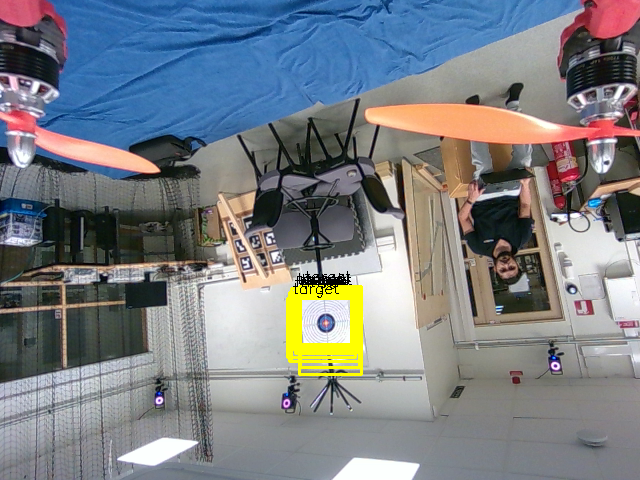

In [ ]:
Image.fromarray(im_without_nms)

### Nonmax suppression

In [ ]:
#TODO : Feed the result_boxes, result_confidences with 0.45 nms threshold. Assign the result to 'indexes' variable.
indexes = cv2.dnn.NMSBoxes(result_boxes, result_confidences, 0, 0.45)

nms_confidences = []
nms_class_ids = []
nms_boxes = []

for i in indexes:
    nms_confidences.append(result_confidences[i])
    nms_class_ids.append(result_class_ids[i])
    nms_boxes.append(result_boxes[i])

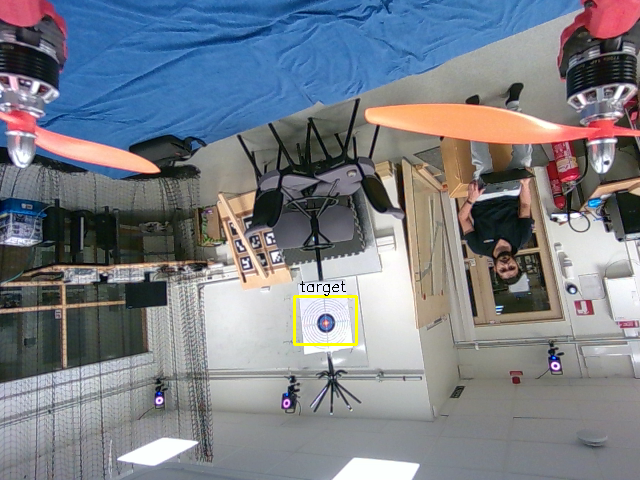

In [ ]:
im_with_nms = displayResults(im.copy(),nms_boxes,nms_confidences,nms_class_ids)
Image.fromarray(im_with_nms)

###Optional
<font color="darkred">Q10 : Train the same YOLOv5 model without pretrained YOLOV5s COCO weights and evaluate target detection performance </font>

**References:**

1. https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
2. https://medium.com/@doleron/training-yolov5-custom-dataset-with-ease-e4f6272148ad
3. https://pub.towardsai.net/detecting-objects-with-yolov5-opencv-python-and-c-c7cf13d1483c
4. https://pylessons.com/YOLOv3-introduction?fbclid=IwZXh0bgNhZW0CMTAAAR0FvzfuDBC-be9m8DKIi7UpQQ0fAMjYMlPRy-LRTxjDR2yQPZ0FiunWkXk_aem_AU1N4NqLRveoXmtmk_mwo43-KUC1lldmKcpnbY12D_79oCTBozRgEe_E7VO1mXswFnL7EqwPuKdNbBvjyBJGuM0E
